# Analyzation of COVID-19 Data

The data for this analyzation has been downloaded from [European Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide). It was uploaded to an S3 bucket. 

# Background Info

The first cases of COVID-19 were origanlly said to have started right around New Year's Eve in the city of Wuhan, China. New evidence is starting to come out that it had been seen as early as November. The virus started to spread in the U.S. when people were traveling in Europe or China and cntracted the virus from one of those two places and brought it back to the U.S. In a couple of days of those people came back, the virus started to spread rapidly. Doctors still do not know too much about the virus and how to create a vaccine for it.  

In [14]:
%matplotlib inline
import pandas

# Import the Data from the S3 Bucket

In [15]:
df = pandas.read_excel('s3://isat252-cs/COVID-19-geographic-disbtribution-worldwide-2020-06-10.xlsx')
df[:10]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-06-10,10,6,2020,542,15,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-06-09,9,6,2020,575,12,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-06-08,8,6,2020,791,30,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-06-07,7,6,2020,582,18,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-06-06,6,6,2020,915,9,Afghanistan,AF,AFG,37172386.0,Asia
5,2020-06-05,5,6,2020,787,6,Afghanistan,AF,AFG,37172386.0,Asia
6,2020-06-04,4,6,2020,758,24,Afghanistan,AF,AFG,37172386.0,Asia
7,2020-06-03,3,6,2020,759,5,Afghanistan,AF,AFG,37172386.0,Asia
8,2020-06-02,2,6,2020,545,8,Afghanistan,AF,AFG,37172386.0,Asia
9,2020-06-01,1,6,2020,680,8,Afghanistan,AF,AFG,37172386.0,Asia


# The Statistics of Cases 

In [26]:
print(df['cases'].mean())# avg number of cases

print(df['cases'].median()) # measure of the center of the data

print(df['cases'].min()) # minimum number of cases

print(df['cases'].max()) # maximum number of cases 

print(df['cases'].std()) # how spread out the data is 

print(df['cases'].var()) # how far the set of data is spread out 

319.1599681303116
3.0
-2461
48529
1851.8473711937163
3429338.6861970774


# Linear Regression of Cases and Deaths 

In [34]:
from scipy import stats 

In [35]:
result = stats.linregress(df['cases'], df["deaths"]) 

In [38]:
print('slope is {}'.format(result.slope)) # Slope of the regression line

print('intercept is {}'.format(result.intercept)) # Intercept of the regression line 

print('R square is {}'.format(result.rvalue*result.rvalue)) # Correlation coefficient

print('p value is {}'.format(result.pvalue)) # Two-sided p value for a hypothesis test whose null hypothesis is that the slope of zero

print('std error is {}'.format(result.stderr)) # Standard error of the estimated gradient

slope is 0.05518866788924502
intercept is 0.5868983425096772
R square is 0.6965886075906138
p value is 0.0
std error is 0.00024233690333215314


# Number of Deaths Per Day 

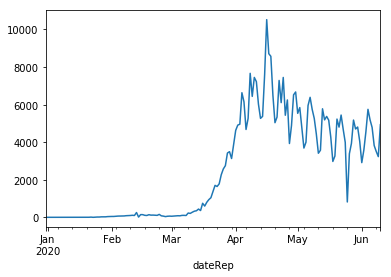

In [20]:
avg_cases_per_year = df.groupby('dateRep').sum()['deaths']
avg_cases_per_year.plot()

This graph shows a huge increase in deaths as starting around beginning of April till now. 

# Top 10 Countries With The Most Cases 

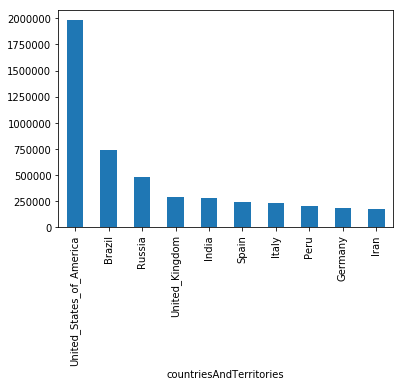

In [43]:
top_countries_most_cases = df.groupby('countriesAndTerritories').sum()['cases']
top_countries_most_cases.nlargest(10).plot.bar()

There is a huge difference between the U.S. and the nine other countries that are on the graph. Once it passes Russia, the amount of casses between the UK and Iran are very similar in numbers. 

# Conclusion 

In conlcusion, if you look at the numbers from when COVID-19 first started to now, there has been a ginormous increase, which is not good. Doctors still do not know how to consistantly stop this virus. There has been different ways for the world to try and stop the virus from spreading which is wearing a mask wherever you go and staying inside your homes unless it is an emergency to leave. This is hard to get everyone to do this though because not everyone is going to listen and will still do their own thing. The only way t completely stop this virus from spreading is for doctors to create a vaccine for the virus, which is what they are working hard to do. 

A limitation that I had while working on the final is that I am still a beginnger programmer, so I can not do too much with programming. After taking this class, it has made me want to take more programming classes to learn more about programming. 

There is not much that I could have done to improve my final because I used all the things that I have learned in this class to make my final good in my opinion. 

